In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd


In [2]:
data_deng=pd.read_csv('dengue.csv')
data_deng=data_deng.drop('Unnamed: 0', axis=1)
data_deng=data_deng.dropna()

In [3]:
data_deng.head()
deng_feat=data_deng[['humid','temp','h10pix','trees','Xmin','Ymin']]

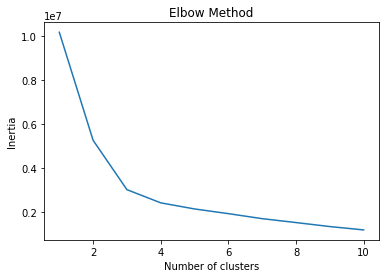

In [4]:
inert = []
#elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10)
    kmeans.fit(deng_feat)
    inert.append(kmeans.inertia_)
plt.plot(range(1,11),inert)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
print('Los resultados indican que 3 clusters es una buena opcion')


Los resultados indican que 3 clusters es una buena opcion


In [6]:
data_bread=pd.read_csv('BreadBasket_DMS.csv')

In [7]:
data_bread.head()
#filas con el mismo valor de transaction pertenecen a la misma compra

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [8]:
#primero vamos a usar one hot encoding para pasar a algo que sklearn pueda leer 
#¿solo las categoricas, transaction se deja quieta
#primero usar el label enconder para que las reciba el one hot

enc = preprocessing.LabelEncoder()
enc_feat = data_bread[['Date','Time','Item']].apply(enc.fit_transform)

enc_feat = pd.DataFrame(enc_feat)
encoded_data = pd.concat([data_bread['Transaction'],enc_feat],axis=1)
#ahora si onehot
onehot = preprocessing.OneHotEncoder(sparse=False)
onehot.fit(encoded_data)

hot_bread = onehot.transform(encoded_data)

np.shape(hot_bread)

(21293, 18025)

First eigen-vector var fraction: 0.3381874180269079  second var 0.19417695709663269


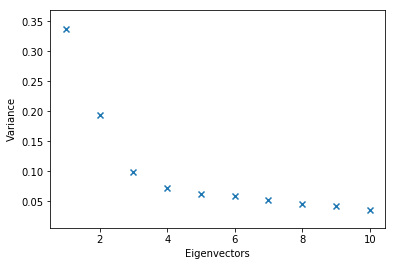

In [9]:
pca = PCA(n_components=10)
pca.fit(hot_bread)
var=pca.explained_variance_
n_com=np.linspace(1,10,10)
plt.scatter(n_com,var/np.sum(var),marker='x')
plt.xlabel('Eigenvectors')
plt.ylabel('Variance')
print('First eigen-vector var fraction:', var[0]/np.sum(var), ' second var', var[1]/np.sum(var))

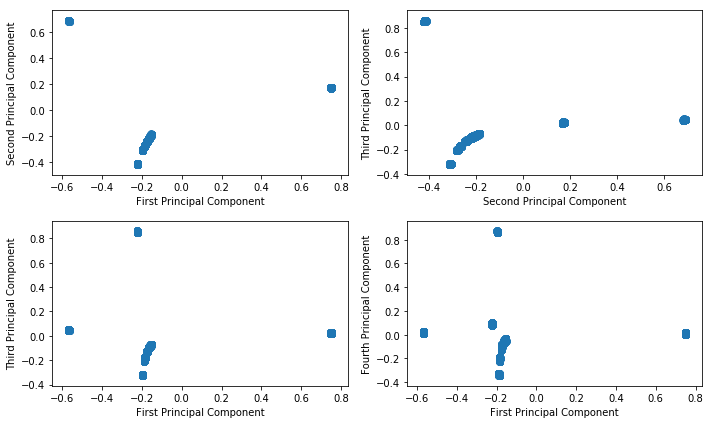

In [10]:
#veamos la proyeccion
bread_proj= pca.transform(hot_bread)
fig1, ax1= plt.subplots(2,2,figsize=(10,6))
ax1[0,0].scatter(bread_proj[:,0],bread_proj[:,1])
ax1[0,0].set_xlabel('First Principal Component')
ax1[0,0].set_ylabel('Second Principal Component')
ax1[1,0].scatter(bread_proj[:,0],bread_proj[:,2])
ax1[1,0].set_xlabel('First Principal Component')
ax1[1,0].set_ylabel('Third Principal Component')
ax1[0,1].scatter(bread_proj[:,1],bread_proj[:,2])
ax1[0,1].set_xlabel('Second Principal Component')
ax1[0,1].set_ylabel('Third Principal Component')
ax1[1,1].scatter(bread_proj[:,0],bread_proj[:,3])
ax1[1,1].set_xlabel('First Principal Component')
ax1[1,1].set_ylabel('Fourth Principal Component')


fig1.tight_layout()

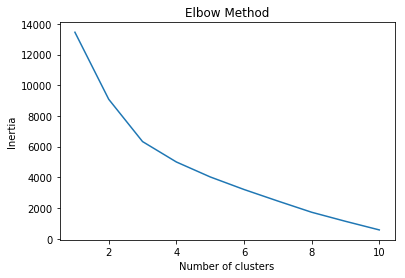

4 clusters podria ser una buena opcion


In [11]:
#Intentar generar clusters  con los datos reducidos por pca porque sin pca se demora mucho
inert = []
#elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10)
    kmeans.fit(bread_proj)
    inert.append(kmeans.inertia_)
plt.plot(range(1,11),inert)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print('4 clusters podria ser una buena opcion')

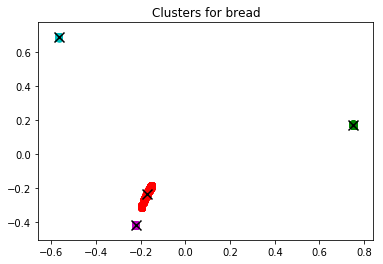

Esto indica que hay 4 tipos de muestras distintas


In [12]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=10,random_state=0) 
clus_index = kmeans_pca.fit_predict(bread_proj) #indices para cada cluster
colors=['g','r','c','m','y','k','b']

for i in range(0,4):
    plt.scatter(np.asarray(bread_proj)[clus_index == i, 0], np.asarray(bread_proj)[clus_index == i,1],c=colors[i], alpha=0.7)

plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1],marker='x',s=100,c='black')


plt.title('Clusters for bread')
plt.show()
print('Esto indica que hay 4 tipos de muestras distintas')

In [13]:
sales=np.asarray(data_bread['Item'])
products=['Bread']
#vamos a ver cuales son los productos que se venden
for i in range(1,len(sales)):
    current = sales[i]
    isin= current in products
    if(isin==False):
        products.append(current)
print(len(products))
#def count_products(cluster_num):
#    counts = np.zeros(len(products))
#    cluster_c=data_bread.iloc[clus_index == cluster_num]
#    for j in range(0,len(counts)):
#        counts[j]=  

95


In [22]:
#vamos a ver que representa cada una de estas muestras con el cluster index
current_c=data_bread.iloc[clus_index == 0]
numcof=len(current_c['Item'][current_c['Item'] == 'Coffee'])
numtea=len(current_c['Item'][current_c['Item'] == 'Tea'])


print('cantidad de veces en las que aparecen los productos en el primer cluster:')
print('Cafe:',numcof)
print('Tea:',numtea)
data_bread.iloc[clus_index == 0].head()


cantidad de veces en las que aparecen los productos en el primer cluster:
Cafe: 5471
Tea: 0


,Date,Time,Transaction,Item
7,2016-10-30,10:13:03,5,Coffee
15,2016-10-30,10:19:12,7,Coffee
28,2016-10-30,10:30:14,12,Coffee
34,2016-10-30,10:31:24,13,Coffee
44,2016-10-30,10:37:08,16,Coffee


In [15]:
data_bread.iloc[clus_index == 1].head()

,Date,Time,Transaction,Item
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies


In [16]:
data_bread.iloc[clus_index == 2].head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
9,2016-10-30,10:13:03,5,Bread
18,2016-10-30,10:20:51,8,Bread
19,2016-10-30,10:21:59,9,Bread
23,2016-10-30,10:27:21,11,Bread


In [17]:
data_bread.iloc[clus_index == 3].head()

,Date,Time,Transaction,Item
16,2016-10-30,10:19:12,7,Tea
31,2016-10-30,10:30:14,12,Tea
76,2016-10-30,11:33:08,36,Tea
82,2016-10-30,11:42:40,38,Tea
91,2016-10-30,11:57:45,42,Tea
